In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [345]:
data = r"clean_cad.csv"
clean_data = pd.read_csv(data)
clean_data["Call Time"] = pd.to_datetime(clean_data["Call Time"], errors='coerce')
clean_data.head(-1) 

,Unnamed: 0,Call Time,Reason for Dispatch,Call Sign,2 Call Sign,Disposition
0,0,2016-01-01 00:00:04,ASSAULT,5E57,5E57,ADVISED
1,1,2016-01-01 00:00:04,ASSAULT,5E57,4X40,ADVISED
2,2,2016-01-01 00:00:04,ASSAULT,5E57,4E53,ADVISED
3,3,2016-01-01 00:00:24,TRAFFIC STOP,5T81,5T81,ADVISED
4,4,2016-01-01 00:02:45,CHECK WELFARE,3X90,3F61,ASSISTED
...,...,...,...,...,...,...
1616823,1616823,2023-12-31 23:20:21,RECKLESS DRIVING,NaN,NaN,REFERRED TO OTHER AGENCY
1616824,1616824,2023-12-31 23:23:05,CRIMINAL TRESPASS,NaN,NaN,DISREGARD
1616825,1616825,2023-12-31 23:26:00,AUDIBLE ALARM,NaN,NaN,INFORMATION ONLY
1616826,1616826,2023-12-31 23:32:06,SUSPICIOUS CONDITIONS,NaN,NaN,QUALITY OF LIFE - NO DISPATCH


In [312]:
cahoots_call_signs = ["1J77", "3J78", "4J79"]

In [313]:
def time_filter_year(table: pd.DataFrame, start_time: int, end_time: int):
    """Filters the call time column of the data. Based off year"""
    filtered_table = table[(table["Call Time"].dt.year >= start_time) & (table["Call Time"].dt.year < end_time)]
    return filtered_table

def time_filter_month(table: pd.DataFrame, start_year: int, start_month: int, end_year: int, end_month: int):
    """Filters the 'Call Time' column of the data based on month and year."""
    # Creating a mask to filter data between two datetime boundaries
    start_date = pd.Timestamp(year=start_year, month=start_month, day=1)
    if end_month == 12:
        end_date = pd.Timestamp(year=end_year + 1, month=1, day=1)
    else:
        end_date = pd.Timestamp(year=end_year, month=end_month + 1, day=1)

    filtered_table = table[(table["Call Time"] >= start_date) & (table["Call Time"] < end_date)]
    return filtered_table

In [314]:
def percent_cahoots_calls(df: pd.DataFrame, cahoot_call_signs: list):
    count_cahoots = 0
    for sign in cahoot_call_signs:
        count_cahoots += len(df[(df["Call Sign"] == sign) | (df["2 Call Sign"] == sign)])
    return (count_cahoots / len(df)) * 100

In [315]:
def filter_incidents(df: pd.DataFrame, column_name, incidents: list) -> pd.DataFrame:
    for i in incidents:
        df = df[df[column_name] != i]
    return df

In [316]:
excluded_incidents = ["TRANSPORT", "TRANSPORT, CAHOOTS"]
excluded_dispositions = ['DISREGARD', 'DISREGARDED BY DISPATCH',
                         'WILL CALL BACK', 'INFORMATION ONLY', 'UNABLE TO DISPATCH',
                         'REFERRED TO OTHER AGENCY', 'DISREGARDED BY PATROL SUPERVISOR',
                         'CALLER CALLED BACK', 'ACCIDENTALLY CHOSE NEW EVENT',
                         'UNABLE TO LOCATE', 'QUALITY OF LIFE - NO DISPATCH',
                         'RELAYED TO UNIVERSITY OF OREGON POLICE', 'FIX-IT TICKET',
                         'RELAYED TO LANE COUNTY SHERIFFS OFFICE', 'CANCEL WHILE ENROUTE']

In [317]:
clean_data = filter_incidents(clean_data, "Disposition", excluded_dispositions)

In [318]:
def calc_monthly_percentages(clean_data: pd.DataFrame, call_signs: list) -> pd.DataFrame:
    percentages = [ ]
    times = [ ]
    for year in range(2016, 2024):
        for month in range(1, 13):  # Months from January (1) to December (12)
            next_month = month + 1 if month < 12 else 1
            next_year = year if month < 12 else year + 1
            month_table = time_filter_month(clean_data, year, month, next_year, next_month)
            percent = percent_cahoots_calls(month_table, call_signs)
            percentages.append(percent)
            times.append(datetime(year=year, month=month, day=1))
            # print(f"In {year}-{month}, Cahoots handled {percent:.2f}% of the total calls")
    return pd.DataFrame({"Time": times, "Percentage": percentages})



In [331]:
#Manually Finding the first occurrance of each call sign

target_call_signs = ["1J77", "3J78", "4J79", "3J81"]

filtered_call_signs = clean_data[clean_data['Call Sign'].isin(target_call_signs)]

first_occurrence_call_sign = filtered_call_signs.groupby('Call Sign')['Call Time'].min()

first_1J77 = first_occurrence_call_sign['1J77']
first_3J78 = first_occurrence_call_sign['3J78']
first_3J81 = first_occurrence_call_sign['3J81']
first_4J79 = first_occurrence_call_sign['4J79']

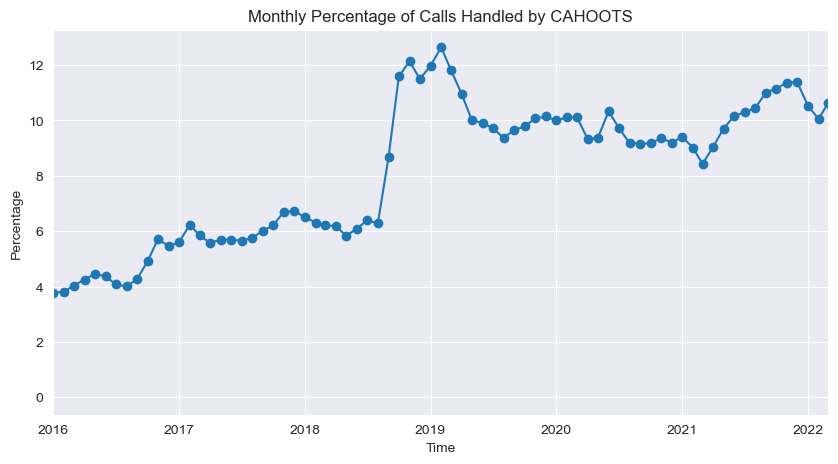

In [333]:
plt.figure(figsize=(10, 5))  
plt.plot(results_table['Time'], results_table['Percentage'], marker='o')  
plt.title('Monthly Percentage of Calls Handled by CAHOOTS') 
plt.xlabel('Time')  
plt.ylabel('Percentage')  
plt.grid(True)  

plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

Dig deeper into uptick in 2018. Added 2nd van? Less total police calls, increase in cahoots calls, or both?
Stick with 2022 data cutoff. 

In [ ]:
results_1_shift = calc_monthly_percentages(clean_data, ["3J78"])
results_2_shift = calc_monthly_percentages(clean_data, ["3J78", "1J77"])
results_3_shift = calc_monthly_percentages(clean_data, ["3J78", "1J77", "4J79"])

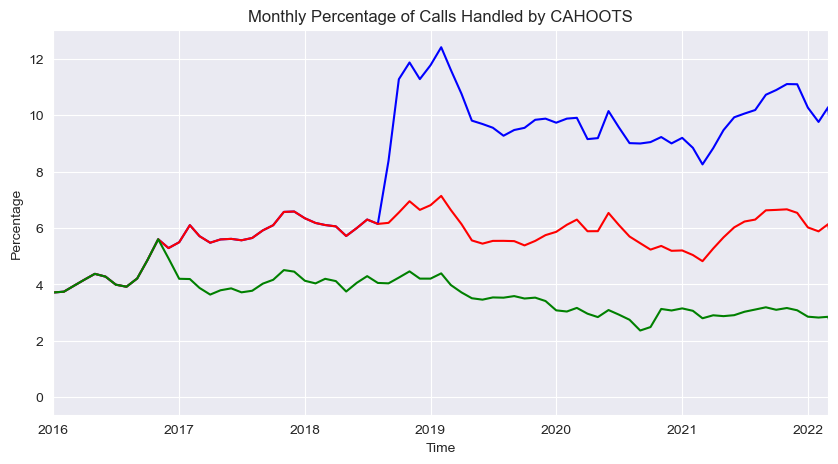

In [340]:
plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(results_3_shift['Time'], results_3_shift['Percentage'], color='b')
plt.plot(results_2_shift['Time'], results_2_shift['Percentage'], color='r')
plt.plot(results_1_shift['Time'], results_1_shift['Percentage'], color='g')

plt.title('Monthly Percentage of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Percentage')  # Y-axis label
plt.grid(True)  # Turn on the grid

plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

In [ ]:
results_3J78 = calc_monthly_percentages(clean_data, ["3J78"])
results_1J77 = calc_monthly_percentages(clean_data, ["1J77"])
results_4J79 = calc_monthly_percentages(clean_data, ["4J79"])

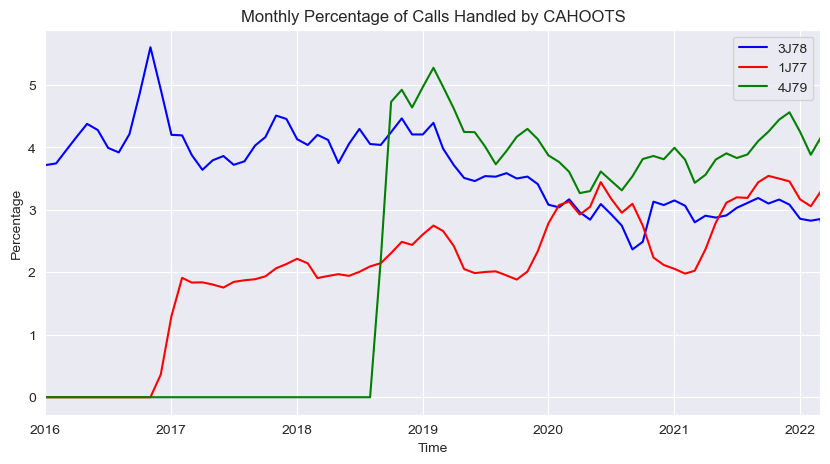

In [341]:

plt.figure(figsize=(10, 5))  # Set the figure size
    
plt.plot(results_3J78['Time'], results_3J78['Percentage'], label="3J78", color='b')
plt.plot(results_1J77['Time'], results_1J77['Percentage'], label="1J77", color='r')
plt.plot(results_4J79['Time'], results_4J79['Percentage'], label="4J79", color='g')
    
plt.title('Monthly Percentage of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Percentage')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc='upper right')
    
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])
    
plt.show()

In [323]:
monthly_call_count = clean_data.groupby([clean_data['Call Time'].dt.to_period('M')])['Call Sign'].size()
monthly_cahoots = clean_data[clean_data['Call Sign'].isin(cahoots_call_signs)]
monthly_call_sign = monthly_cahoots.groupby([monthly_cahoots['Call Time'].dt.to_period('M')])['Call Sign'].size()
total_vs_cahoot = pd.merge(monthly_call_count, monthly_call_sign, on='Call Time', how='left').reset_index()
total_vs_cahoot['Call Time'] = total_vs_cahoot['Call Time'].dt.to_timestamp()
total_vs_cahoot = total_vs_cahoot.rename(columns={'Call Sign_x': "Total Calls", 'Call Sign_y': "Cahoots Calls"}).dropna()
total_vs_cahoot["Non Cahoots Calls"] = total_vs_cahoot["Total Calls"] - total_vs_cahoot['Cahoots Calls']
total_vs_cahoot = total_vs_cahoot[["Call Time", "Non Cahoots Calls", "Cahoots Calls", "Total Calls"]]

In [324]:
total_vs_cahoot

,Call Time,Non Cahoots Calls,Cahoots Calls,Total Calls
0,2016-01-01,12512.0,414.0,12926
1,2016-02-01,12808.0,374.0,13182
2,2016-03-01,12448.0,424.0,12872
3,2016-04-01,12221.0,397.0,12618
4,2016-05-01,12607.0,454.0,13061
...,...,...,...,...
72,2022-01-01,12753.0,1345.0,14098
73,2022-02-01,11822.0,1110.0,12932
74,2022-03-01,12684.0,1209.0,13893
75,2022-04-01,11435.0,1210.0,12645


(16801.0, 19052.0)

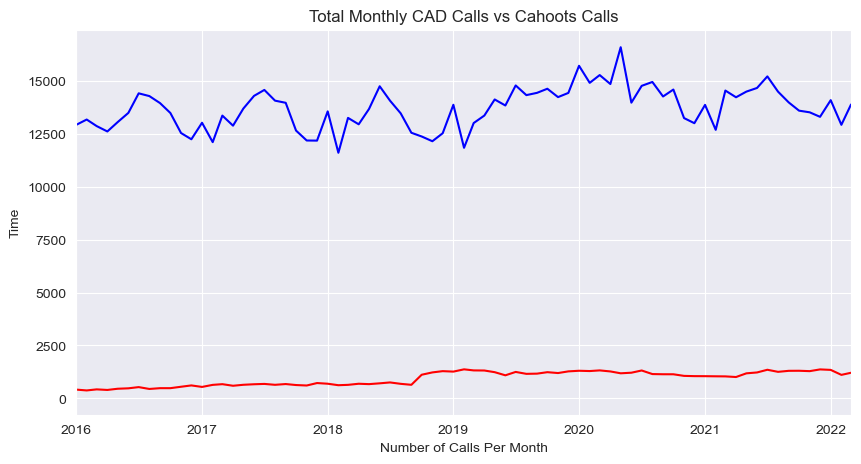

In [342]:
plt.figure(figsize=(10, 5))
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Total Calls'], color='b')
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Cahoots Calls'], color='r')
plt.xlabel("Number of Calls Per Month")
plt.ylabel("Time")
plt.title("Total Monthly CAD Calls vs Cahoots Calls")
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

(16801.0, 19052.0)

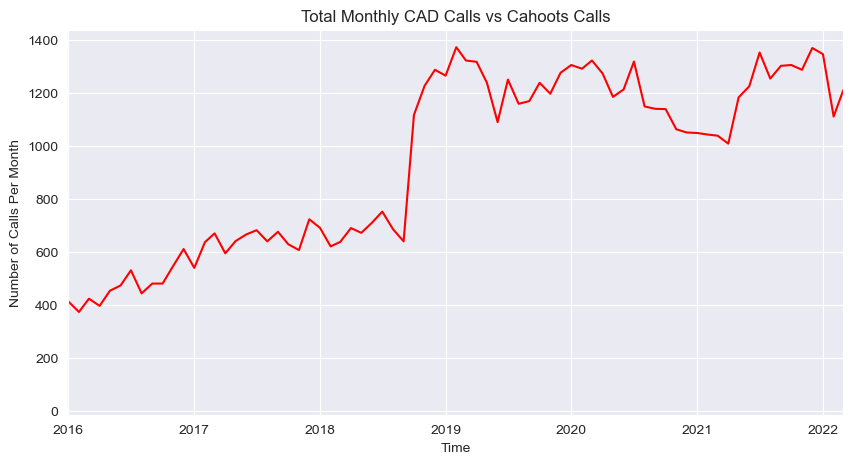

In [343]:
plt.figure(figsize=(10, 5))
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Cahoots Calls'], color='r')
plt.ylabel("Number of Calls Per Month")
plt.xlabel("Time")
plt.title("Total Monthly CAD Calls vs Cahoots Calls")
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

In [327]:
# clean_data["Call Sign Letter"] = clean_data["Call Sign"].str[1]
call_dispatch_count = clean_data.groupby(['Call Sign', "Reason for Dispatch"]).count().reset_index()
call_dispatch_count.rename(columns={'Unnamed: 0': 'Count'}, inplace=True)
call_dispatch_count = call_dispatch_count[["Call Sign", "Reason for Dispatch", "Count"]]
# call_dispatch_pivot = pd.pivot_table(call_dispatch_count, values='Unnamed: 0', index='Call Sign Letter', columns='Reason for Dispatch', aggfunc='sum').reset_index()
# call_dispatch_pivot
top_three_per_reason = call_dispatch_count.sort_values(["Call Sign", 'Count'], ascending=[True, False])
# call_dispatch_count
top_three_per_reason

,Call Sign,Reason for Dispatch,Count
5,&,THEFT FROM VEHICLE,10
4,&,THEFT,5
1,&,CRIMINAL MISCHIEF,2
2,&,FRAUD,2
0,&,BURGLARY,1
...,...,...,...
48783,Z999,LOST PROPERTY,2
48786,Z999,THEFT OF GUN,2
48781,Z999,CRIMINAL MISCHIEF,1
48782,Z999,FRAUD,1


In [328]:

call_dispatch_count["Reason for Dispatch"].unique()

array(['BURGLARY', 'CRIMINAL MISCHIEF', 'FRAUD', 'LOST PROPERTY', 'THEFT',
       'THEFT FROM VEHICLE', 'THEFT OF BICYCLE', 'THEFT OF IDENTITY',
       'FORGERY', 'LOUD PARTY', 'PERSON STOP', 'THEFT BY DECEPTION',
       'THEFT OF GUN', 'HARASSMENT', 'THEFT OF LICENSE PLATE',
       'ASSIST FIRE DEPARTMENT', 'THEFT OF MAIL', 'ALARM DURESS',
       'ALARM PANIC', 'ANIMAL CRUELTY', 'ASSAULT WITH INJURY',
       'ASSIST SHERIFFS OFFICE', 'BLOCKED SIDEWALK', 'CHECK WELFARE',
       'CITIZEN CONTACT', 'CIVIL STANDBY', 'CRIMINAL TRESPASS',
       'DECEASED SUBJECT', 'DISABLED VEHICLE', 'DISORDERLY SUBJECT',
       'DISPUTE', 'DISPUTE FAMILY', 'FIGHT', 'FOLLOW UP', 'HIT AND RUN',
       'HIT AND RUN INJURY', 'INCOMPLETE CALL', 'LOCATION RUNAWAY',
       'LOCATION STOLEN PROPERTY', 'LOCATION WANTED SUBJECT',
       'MOTOR VEH ACC UNKNOWN INJ', 'OVERDOSE', 'PATROL CHECK',
       'RECOVERED STOLEN VEHICLE', 'SHOPLIFT 3050 PROGRAM',
       'SUICIDAL SUBJECT', 'SUSPICIOUS CONDITIONS', 'SUSPICIOUS 

In [329]:
call_dispatch_pivot["Reason for Dispatch"].unique()

KeyError: 'Reason for Dispatch'

Want to perform a Chi-Square test on the data. Going to start with entire dataset, to verify that there was not an increase of cad calls at the end of 2018. Then, I will retest with each individual call sign against the same CAD data of the time

**Everything below this is data validation and manually finding values**

In [344]:
clean_data[clean_data['Call Sign'] == '3J81']

,Unnamed: 0,Call Time,Reason for Dispatch,Call Sign,2 Call Sign,Disposition
1032039,1032039,2021-08-18 22:51:38,MOTOR VEH ACC UNKNOWN INJ,3J81,3J81,ASSISTED
1084034,1084034,2018-08-30 12:34:49,PERSON STOP,3J81,3J81,PERSON STOP ONLY
1375234,1375234,2018-11-03 13:19:23,CHECK WELFARE,3J81,3J81,ASSISTED
1375235,1375235,2018-11-03 13:19:23,CHECK WELFARE,3J81,2S12,ASSISTED
1375236,1375236,2018-11-03 13:19:23,CHECK WELFARE,3J81,2S13,ASSISTED
1514098,1514098,2019-12-06 21:43:59,ASSIST PUBLIC- POLICE,3J81,3J81,GONE ON ARRIVAL
1535748,1535748,2021-12-11 22:58:57,MOTOR VEH ACC UNKNOWN INJ,3J81,3J81,ASSISTED


In [ ]:
test = clean_data[clean_data['Call Sign'] == 'CAHOT']
test

In [ ]:
# test['Disposition'].unique()
test['Reason for Dispatch'].unique()

In [ ]:
test['Disposition'].unique()